In [37]:
##### setting
### set filename you want to analysis
pkldata = None

if pkldata == None:
    import os
    import smooziee
    pkldata = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GL711_p0p55_RT_1.pkl')

In [38]:
##### import
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
import matplotlib.pyplot as plt
imp.reload(fitting)
imp.reload(peak_search)

<module 'smooziee.smooziee.peak_search' from '/home/kondo/git/smooziee/smooziee/peak_search.py'>

the number of peaks: 9


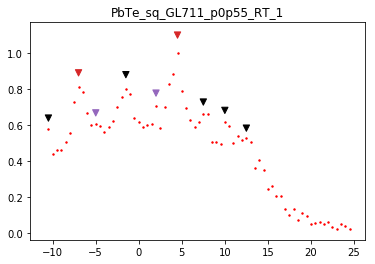

In [39]:
peak_num = fitting.result_peaksearch(pkldata)

In [40]:
fitter = fitting.Fitting(pkldata, ['lorentzian' for i in range(peak_num)])

In [41]:
fitter.set_params_vary(range(peak_num), ['center'], vary=False)


In [42]:
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1    1e-08      inf     None     True     None     None
l0_center        -10.5     -inf      inf     None    False     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf     None     True     None     None
l1_amplitude         1    1e-08      inf     None     True     None     None
l1_center           -7     -inf      inf     None    False     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1    1e-08      inf     None     True     None     None
l2_amplitude         1    1e-08      inf     None     True 

In [43]:
fitter.fit()
fitter.set_result_param_to_inital()
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     1.214    1e-08      inf   0.4031     True     None     None
l0_center        -10.5     -inf      inf        0    False     None     None
l0_fwhm          2.208     -inf      inf   0.5535    False 2.0000000*l0_sigma     None
l0_height       0.3501     -inf      inf  0.04921    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma         1.104    1e-08      inf   0.2767     True     None     None
l1_amplitude     1.544    1e-08      inf   0.3118     True     None     None
l1_center           -7     -inf      inf        0    False     None     None
l1_fwhm          2.264     -inf      inf   0.2515    False 2.0000000*l1_sigma     None
l1_height       0.4343     -inf      inf  0.05341    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         1.132    1e-08      inf   0.1257     True     None     None
l2_amplitude      3.88    1e-08      inf    1.274     True 

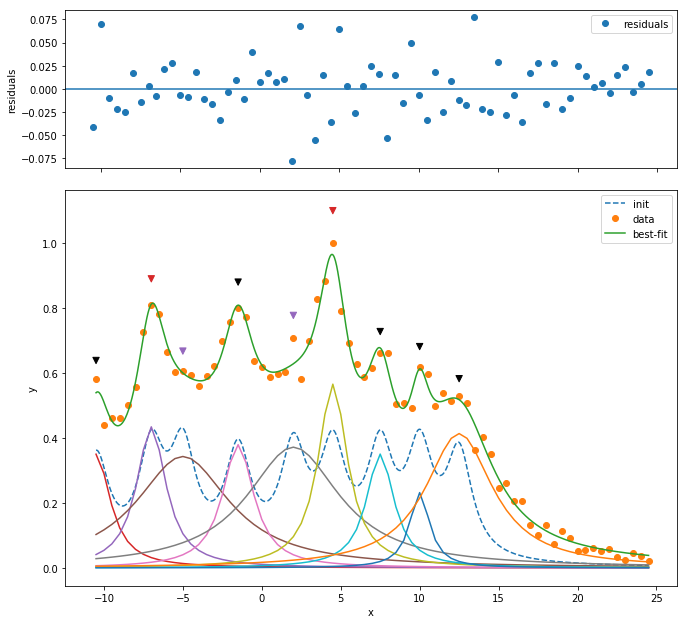

In [44]:
fitter.plot(show_init=True, eval_components=True)

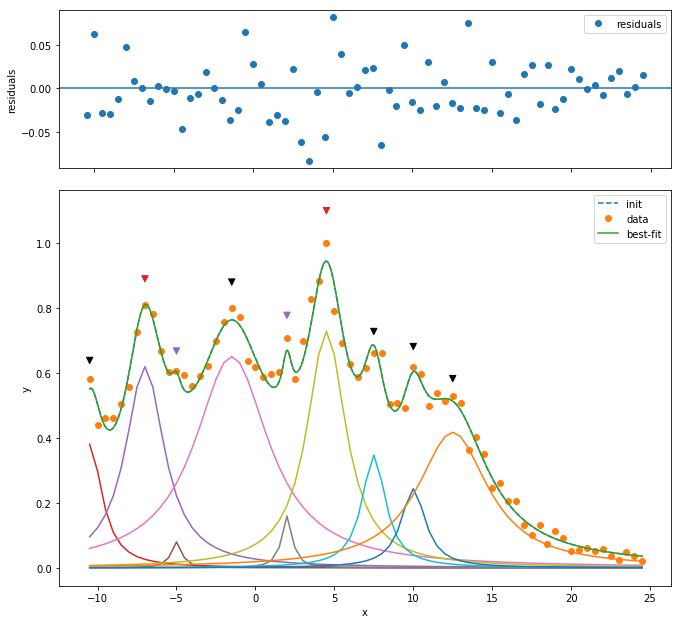

In [65]:
fitter.set_params(i_peak=2, param_name='sigma', values={'value': 0.4})
fitter.set_params(i_peak=2, param_name='amplitude', values={'value': 0.1})
fitter.set_params(i_peak=4, param_name='amplitude', values={'value': 0.2})
fitter.plot_from_params(show_init=True, eval_components=True)
# fitter.params.pretty_print()

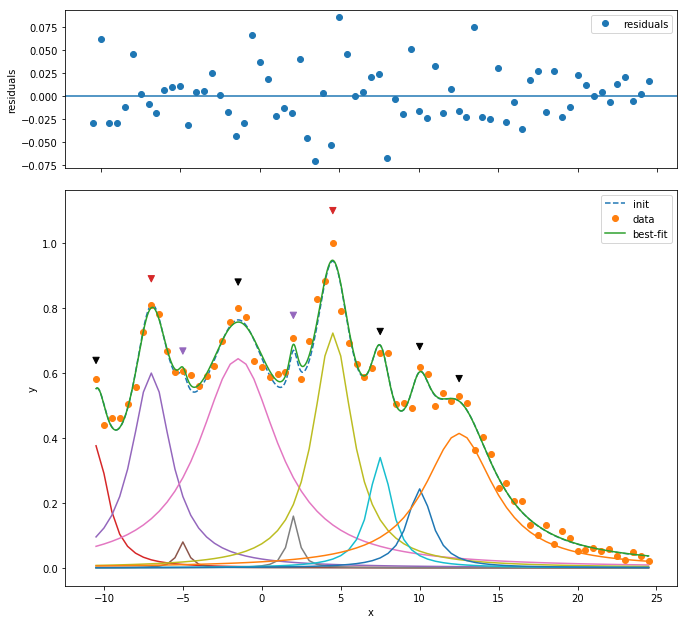

In [66]:
fitter.set_params_vary([2, 4], ['sigma', 'amplitude'], vary=False)
fitter.fit()
fitter.set_result_param_to_inital()
fitter.plot(show_init=True, eval_components=True)

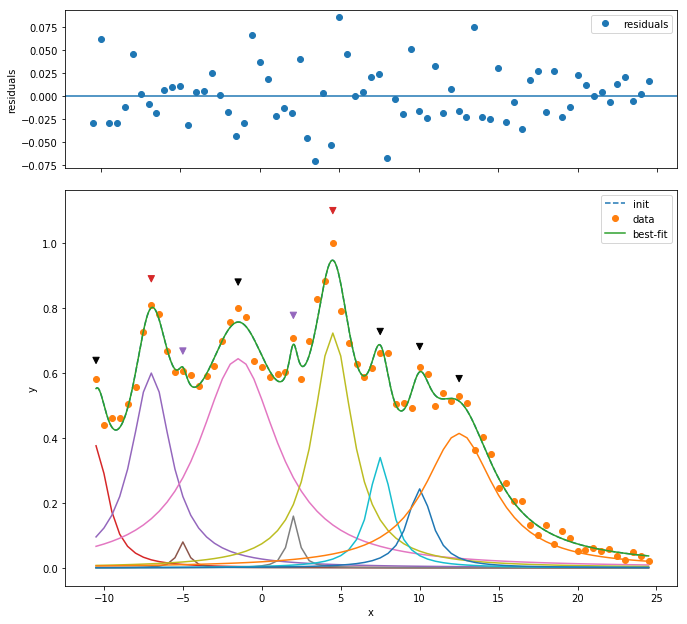

In [67]:
fitter.fit()
fitter.set_result_param_to_inital()
fitter.plot(show_init=True, eval_components=True)

In [68]:
fitter.set_params_vary(None, None, vary=True, all_param=True,
                      onlyif_expr_isnone=True)
fitter.fit()
fitter.set_result_param_to_inital()
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     73.93    1e-08      inf 7.65e+04     True     None     None
l0_center       -12.98     -inf      inf    9.266     True     None     None
l0_fwhm         0.2219     -inf      inf    230.5    False 2.0000000*l0_sigma     None
l0_height        212.1     -inf      inf 4.398e+05    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma         0.111    1e-08      inf    115.3     True     None     None
l1_amplitude     2.724    1e-08      inf   0.4776     True     None     None
l1_center       -6.894     -inf      inf  0.07298     True     None     None
l1_fwhm          2.958     -inf      inf   0.2597    False 2.0000000*l1_sigma     None
l1_height       0.5863     -inf      inf  0.06634    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         1.479    1e-08      inf   0.1298     True     None     None
l2_amplitude    0.1336    1e-08      inf  0.07005     True

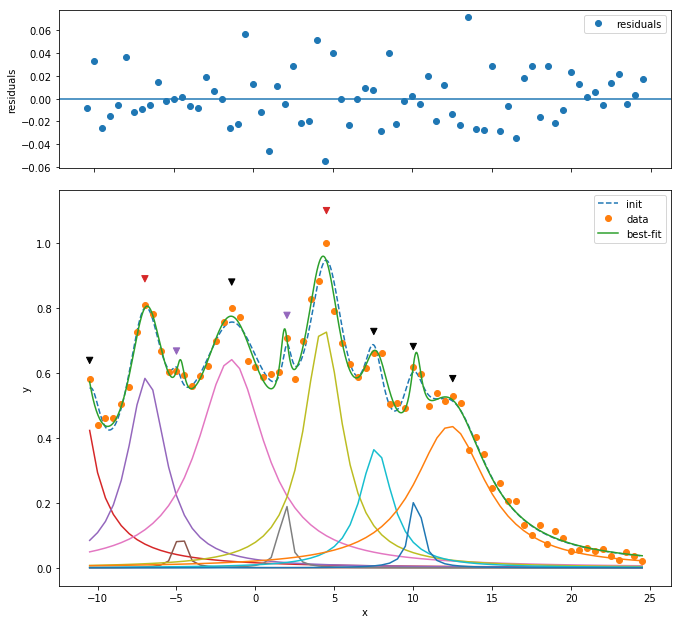

In [69]:
fitter.plot(show_init=True, eval_components=True)
# type(fitter.result)

In [13]:
fitter.set_params_vary(None, None, vary=True, all_param=True,
                       onlyif_expr_isnone=False)
fitter.fit()
fitter.set_result_param_to_inital()
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     36.15    1e-08      inf     None     True     None     None
l0_center       -11.75     -inf      inf     None     True     None     None
l0_fwhm        0.08124     -inf      inf     None     True     None     None
l0_height        228.7     -inf      inf     None     True     None     None
l0_sigma       0.04145    1e-08      inf     None     True     None     None
l1_amplitude    0.8426    1e-08      inf     None     True     None     None
l1_center       -6.965     -inf      inf     None     True     None     None
l1_fwhm          1.427     -inf      inf     None     True     None     None
l1_height       0.2855     -inf      inf     None     True     None     None
l1_sigma        0.8398    1e-08      inf     None     True     None     None
l2_amplitude     5.606    1e-08      inf     None     True     None     None
l2_center       -6.114     -inf      inf     None     True     None     No

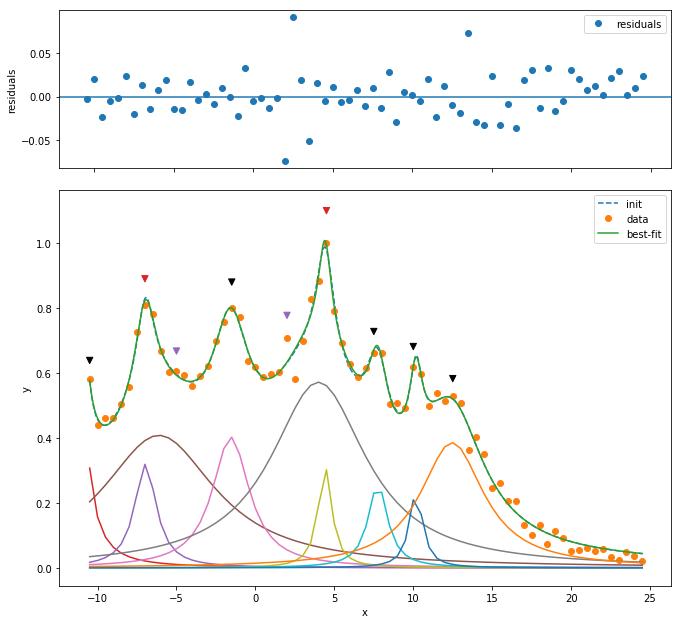

In [14]:
fitter.plot(show_init=True, eval_components=True)